## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

np.random.seed(1008)
sns.set(style='white', context='notebook', palette='deep')
plt.style.use('fivethirtyeight')

## Load data

In [2]:
dataset = pd.read_pickle(r'./data/raw_features_DDupdated_deidentified.pkl')
dataset

,icu_outcome,age,sex,pregnant,race,ethn,bmi,previous_surgeries,travel,Primary Contact,...,Coagulation Profile,il6,D-Dimer,Procalcitonin,Arterial Blood pH,Bicarbonate,Partial pressure of oxygen,Partial pressure of carbon dioxide,Oxygen saturation,SpO2
0,1,65,0,0.0,7,1,46.60,0.0,0,2,...,NaN,NaN,1.56,0.45,7.34,26.0,129.0,47.0,99.0,53.0
1,1,73,1,0.0,7,1,35.42,1.0,0,2,...,NaN,NaN,7.52,0.16,7.28,19.0,76.0,39.0,95.0,48.0
2,1,73,0,0.0,7,1,22.75,0.0,0,1,...,23.1,NaN,2.75,5.15,7.41,18.0,77.0,29.0,98.0,100.0
3,1,30,1,0.0,7,1,44.95,1.0,1,2,...,NaN,NaN,1.71,0.45,7.45,22.0,98.0,31.0,99.0,96.0
4,1,62,0,0.0,7,1,32.95,NaN,0,0,...,NaN,NaN,0.54,0.23,7.20,27.0,178.0,67.0,99.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0,90,1,0.0,3,2,24.05,1.0,0,1,...,NaN,NaN,0.48,0.22,7.30,16.7,36.0,34.0,72.1,94.0
208,0,65,0,0.0,6,2,39.34,1.0,0,0,...,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,NaN,97.0
209,0,78,1,0.0,6,2,28.22,0.0,0,0,...,NaN,NaN,0.15,0.20,NaN,NaN,NaN,NaN,NaN,99.0
210,0,33,1,0.0,6,2,41.02,0.0,0,1,...,NaN,NaN,0.44,0.11,NaN,NaN,NaN,NaN,NaN,98.0


## Data pre-processing

### Check for null or missing values

In [3]:
pd.options.display.width = 0

# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

#dataset.info()
#dataset.isnull().sum()

icu_outcome                             0
age                                     0
sex                                     0
pregnant                                0
race                                    0
                                     ... 
Bicarbonate                           141
Partial pressure of oxygen            141
Partial pressure of carbon dioxide    141
Oxygen saturation                     142
SpO2                                    4
Length: 84, dtype: int64

### Dropping features with >60% missing values

Text(0, 0.5, '% missing values')

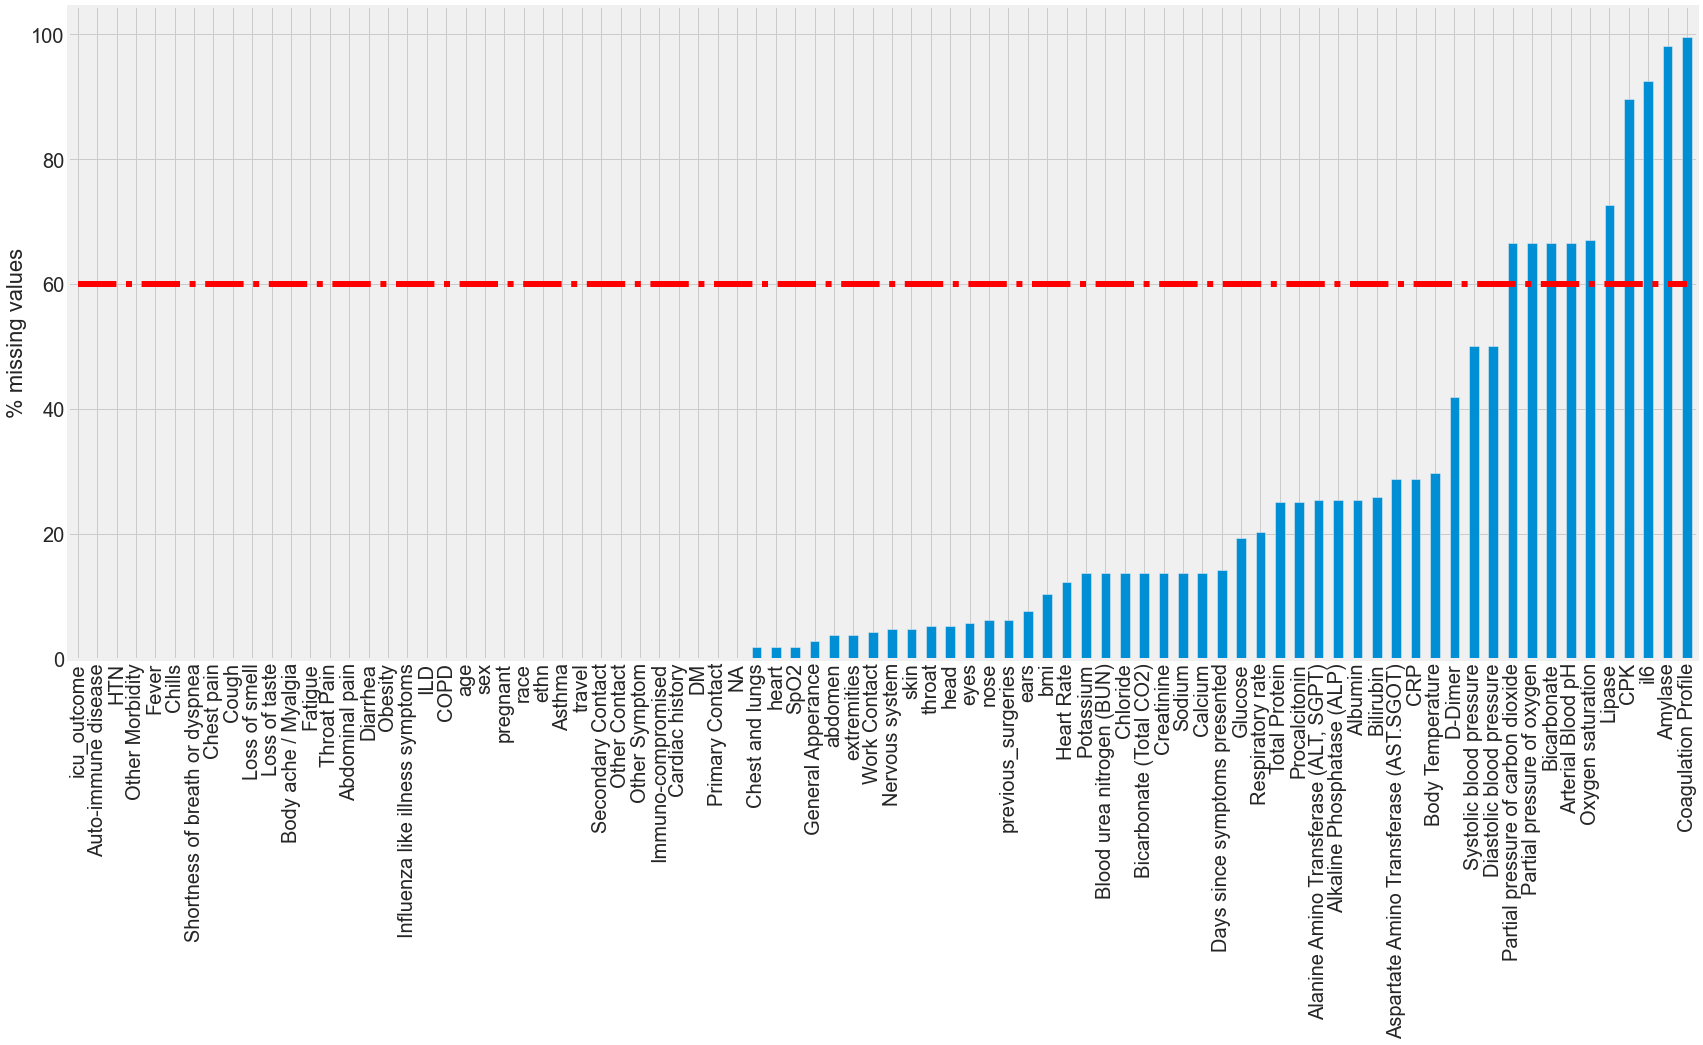

In [4]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing, 
                                'no_of_missing': dataset.isnull().sum()})
missing_value_df.sort_values('percent_missing', inplace=True)
plt.figure(figsize=(26,12))
missing_value_df.percent_missing.plot.bar(fontsize=20)
plt.plot(np.arange(len(dataset.columns)), np.ones(len(dataset.columns))*60, '-.', color='red', linewidth=6)
plt.grid(True)
plt.ylabel('% missing values', fontsize=22)

In [5]:
if len(dataset)==212:
    dataset.drop(['Partial pressure of carbon dioxide', 'Partial pressure of oxygen', 'Bicarbonate', 
                  'Arterial Blood pH', 'Oxygen saturation', 'Lipase', 'CPK', 'il6', 'Amylase',
                  'Coagulation Profile'], axis=1, inplace=True)
elif len(dataset)==188:   
    dataset.drop(['Partial pressure of carbon dioxide', 'Partial pressure of oxygen', 'Bicarbonate', 
                  'Arterial Blood pH', 'Oxygen saturation', 'Lipase', 'CPK', 'il6', 'Amylase', 
                  'Coagulation Profile'], axis=1, inplace=True)
elif len(dataset)==156:
    dataset.drop(['Partial pressure of carbon dioxide', 'Partial pressure of oxygen', 'Bicarbonate',
                  'Arterial Blood pH', 'Oxygen saturation', 'Lipase'], axis=1, inplace=True)
dataset.tail(10)

,icu_outcome,age,sex,pregnant,race,ethn,bmi,previous_surgeries,travel,Primary Contact,...,Blood urea nitrogen (BUN),Creatinine,Alkaline Phosphatase (ALP),"Alanine Amino Transferase (ALT, SGPT)",Aspartate Amino Transferase (AST.SGOT),Bilirubin,CRP,D-Dimer,Procalcitonin,SpO2
202,0,19,1,0.0,6,2,26.26,1.0,0,1,...,7.0,0.67,55.0,44.0,39.0,0.3,2.5,0.98,NaN,96.0
203,0,93,1,0.0,2,2,24.80,1.0,0,0,...,41.0,1.20,105.0,17.0,56.0,0.6,NaN,NaN,NaN,83.0
204,0,92,0,0.0,6,2,20.75,0.0,0,0,...,48.0,1.80,96.0,29.0,52.0,0.5,36.8,NaN,2.19,92.0
205,0,21,1,1.0,6,1,22.93,0.0,0,0,...,7.0,0.60,130.0,14.0,22.0,0.3,4.7,0.82,0.11,96.0
206,1,85,1,0.0,6,2,30.64,0.0,0,0,...,112.0,3.40,71.0,34.0,40.0,0.3,0.6,0.39,NaN,97.0
207,0,90,1,0.0,3,2,24.05,1.0,0,1,...,32.0,1.00,87.0,29.0,50.0,0.2,4.8,0.48,0.22,94.0
208,0,65,0,0.0,6,2,39.34,1.0,0,0,...,18.0,0.63,135.0,5.0,16.0,0.2,5.1,0.23,NaN,97.0
209,0,78,1,0.0,6,2,28.22,0.0,0,0,...,28.0,0.60,107.0,15.0,27.0,0.3,2.1,0.15,0.20,99.0
210,0,33,1,0.0,6,2,41.02,0.0,0,1,...,16.0,0.80,91.0,43.0,42.0,0.4,7.7,0.44,0.11,98.0
211,1,47,1,0.0,6,1,28.32,1.0,0,2,...,10.0,0.50,198.0,60.0,66.0,0.6,6.2,0.40,0.37,94.0


### Outlier detection

In [6]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

dataset.columns.to_series().groupby(dataset.dtypes).groups

Outliers_to_drop = detect_outliers(dataset,2,["bmi","Days since symptoms presented",
                                              'Systolic blood pressure', 'Diastolic blood pressure', 
        'Heart Rate', 'Respiratory rate', 'Body Temperature',
        'Glucose', 'Calcium',
        'Albumin', 'Total Protein', 'Sodium', 'Potassium',
        'Bicarbonate (Total CO2)', 'Chloride', 'Blood urea nitrogen (BUN)',
        'Creatinine', 'Alkaline Phosphatase (ALP)',
        'Alanine Amino Transferase (ALT, SGPT)',
        'Aspartate Amino Transferase (AST.SGOT)', 'Bilirubin', 'CRP',
        'D-Dimer', 'Procalcitonin'])

In [7]:
dataset.loc[Outliers_to_drop]

,icu_outcome,age,sex,pregnant,race,ethn,bmi,previous_surgeries,travel,Primary Contact,...,Blood urea nitrogen (BUN),Creatinine,Alkaline Phosphatase (ALP),"Alanine Amino Transferase (ALT, SGPT)",Aspartate Amino Transferase (AST.SGOT),Bilirubin,CRP,D-Dimer,Procalcitonin,SpO2


Apparently, there are not any outliers in this dataset.

### Renaming features

In [8]:
dataset.rename(columns={"Influenza like illness symptoms": "Influenza like symp.",
                         "Shortness of breath or dyspnea": "Dyspnea",
                        "Aspartate Amino Transferase (AST.SGOT)": "AST/SGOT",
                        "Alanine Amino Transferase (ALT, SGPT)": "ALT/SGPT",
                       "Blood urea nitrogen (BUN)": "BUN"}, inplace=True)

### Data statistics

In [9]:
dataset.describe()

,icu_outcome,age,sex,pregnant,race,ethn,bmi,previous_surgeries,travel,Primary Contact,...,BUN,Creatinine,Alkaline Phosphatase (ALP),ALT/SGPT,AST/SGOT,Bilirubin,CRP,D-Dimer,Procalcitonin,SpO2
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,190.000000,199.000000,212.000000,212.000000,...,183.000000,183.000000,158.000000,158.000000,151.000000,157.000000,151.000000,123.000000,159.000000,208.000000
mean,0.349057,53.212264,0.419811,0.094340,6.358491,1.504717,29.733158,0.447236,0.070755,1.023585,...,20.953880,1.358634,94.348101,45.772152,59.622517,0.734395,109.153642,1.682439,0.927170,92.894231
std,0.477800,18.442616,0.494696,0.390122,1.292990,0.670980,8.398951,0.498462,0.257022,0.910398,...,21.983436,1.973725,56.553670,38.039353,49.433827,1.674343,96.087507,2.968486,3.498916,7.115905
min,0.000000,12.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.560000,0.370000,29.000000,5.000000,13.000000,0.200000,0.600000,0.140000,0.020000,48.000000
25%,0.000000,40.750000,0.000000,0.000000,6.000000,1.000000,25.315000,0.000000,0.000000,0.000000,...,9.500000,0.700000,64.000000,20.250000,30.500000,0.300000,33.200000,0.400000,0.110000,91.000000
50%,0.000000,53.000000,0.000000,0.000000,7.000000,1.000000,29.000000,0.000000,0.000000,1.000000,...,13.000000,0.840000,80.000000,35.500000,47.000000,0.500000,91.700000,0.810000,0.180000,95.000000
75%,1.000000,67.250000,1.000000,0.000000,7.000000,2.000000,32.860000,1.000000,0.000000,2.000000,...,21.000000,1.100000,105.000000,56.000000,67.000000,0.700000,168.900000,1.435000,0.425000,97.000000
max,1.000000,93.000000,1.000000,2.000000,7.000000,3.000000,84.050000,1.000000,1.000000,2.000000,...,137.000000,17.590000,417.000000,247.000000,355.000000,20.500000,470.800000,20.000000,31.900000,100.000000


## Correlation Matrix

Next, let's look at the correlation in data and plot correlation matrix. This will give us an idea about which features are highly correlated with ICU outcomes and which are not. This gives us an insight about the data at hand and could also be useful in reducing the dimensionality of dataset and for data imputation.

In [27]:
# impute missing data with iterative imputation
imp0 = IterativeImputer(max_iter=10, n_nearest_features=3, random_state=0)
fit_dataset = imp0.fit(dataset)
imputed_dataset = imp0.transform(dataset)
imputed_dataset_df = dataset
for i in range(len(dataset)):
    imputed_dataset_df.iloc[i] = imputed_dataset[i]


In [ ]:
# Correlation matrix between numerical values 
plt.figure(figsize=(40,40))
dataset_corr = dataset.corr(min_periods = int(0.6*len(dataset)))

sns.set(font_scale=3.2)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

ax = sns.heatmap(dataset_corr, annot=True, cbar=True, cmap=sns.diverging_palette(20, 220, n=200), label="big", annot_kws={"size":12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Let's find and plot 10 most highly (positivly or negatively) correlated features with ICU outcome.

In [ ]:
## Find top features
top_row = dataset_corr['icu_outcome'].abs()
sorted_top_row = top_row.sort_values(ascending=False)

imp10_df = dataset.loc[:, sorted_top_row.index[:11]]

corr10_df = imp10_df.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=3.2)
ax = sns.heatmap(corr10_df, annot=True, cbar=True, cmap=sns.diverging_palette(20, 220, n=200),
                  label="big", annot_kws={"size":16}, vmin=-1, vmax=1)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(sorted_top_row.index[:11], rotation=90)
plt.tight_layout()

In [ ]:
sns.set(font_scale=1.4)
corr10_df.reset_index(inplace=True)
corr10_df.loc[:, ['index', 'icu_outcome']]
plt.figure(figsize=(6,9), dpi=300)
g = sns.barplot(y="index", x="icu_outcome", 
                data = corr10_df.loc[1:, ['index', 'icu_outcome']], palette="Set3",orient = "h")
plt.title("Correlation coefficient", fontsize=30)
g.set_ylabel("Input features", fontsize=25)
g.set_xlabel("", fontsize=25)

g.tick_params(labelsize=18)


plt.grid(True)

## Modeling

Split `dataset` into features (`X_data`) and labels (`Y_data`).

In [10]:
dataset["icu_outcome"] = dataset["icu_outcome"].astype(int)

Y_data = dataset["icu_outcome"]
X_data = dataset.drop(labels = ["icu_outcome"], axis = 1)
X_data.head()

,age,sex,pregnant,race,ethn,bmi,previous_surgeries,travel,Primary Contact,Secondary Contact,...,BUN,Creatinine,Alkaline Phosphatase (ALP),ALT/SGPT,AST/SGOT,Bilirubin,CRP,D-Dimer,Procalcitonin,SpO2
0,65,0,0.0,7,1,46.60,0.0,0,2,2,...,17.0,1.01,NaN,NaN,NaN,NaN,169.0,1.56,0.45,53.0
1,73,1,0.0,7,1,35.42,1.0,0,2,2,...,23.0,0.57,119.0,33.0,65.0,0.4,50.8,7.52,0.16,48.0
2,73,0,0.0,7,1,22.75,0.0,0,1,1,...,22.0,1.51,288.0,11.0,51.0,2.1,147.3,2.75,5.15,100.0
3,30,1,0.0,7,1,44.95,1.0,1,2,2,...,9.0,0.69,56.0,113.0,NaN,0.4,51.0,1.71,0.45,96.0
4,62,0,0.0,7,1,32.95,NaN,0,0,0,...,17.0,0.90,77.0,21.0,36.0,0.5,240.2,0.54,0.23,96.0


Impute the missing values using [iterative imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

In [11]:
random_state = 1008
n_test_folds = 5
n_val_folds = 5

imp0 = IterativeImputer(max_iter=10, n_nearest_features=3, random_state=0)
kfold = StratifiedKFold(n_splits=n_test_folds, random_state=random_state)#, shuffle=True)
print(kfold)

stratified_fold = []
for train_index, test_index in kfold.split(X_data, Y_data):
    stratified_fold.append(list(test_index))

cv_strategy = 'random'

StratifiedKFold(n_splits=5, random_state=1008, shuffle=False)


Next, we consider 6 different ML models (Adaptive Boosting, Random Forest, Extra tree Classifier, Gradient Boosting, Support Vector Machine, and Multi-layer perceptron) to predict ICU admission of patients given socio-demographical and clinical features at the time of admission. We tune the important hyper-parameters of all these models using two different cross-validation strategy ([grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [random search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)).

### AdaBoost Decision Tree Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   14.5s finished


Best parameters set found on development set:

{'n_estimators': 2, 'learning_rate': 3.0806308231930433, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'entropy', 'algorithm': 'SAMME.R'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished


Best parameters set found on development set:

{'n_estimators': 1, 'learning_rate': 1.7293057465194093, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'entropy', 'algorithm': 'SAMME.R'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished


Best parameters set found on development set:

{'n_estimators': 1, 'learning_rate': 3.4205398327865684, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'entropy', 'algorithm': 'SAMME.R'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished


Best parameters set found on development set:

{'n_estimators': 1, 'learning_rate': 2.5451162792352147, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'gini', 'algorithm': 'SAMME.R'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters set found on development set:

{'n_estimators': 1, 'learning_rate': 3.376152042418893, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'entropy', 'algorithm': 'SAMME.R'}
Acc. on test set = 0.6695459579180509
ROCAUC on test set = 0.6476190476190475


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.65')

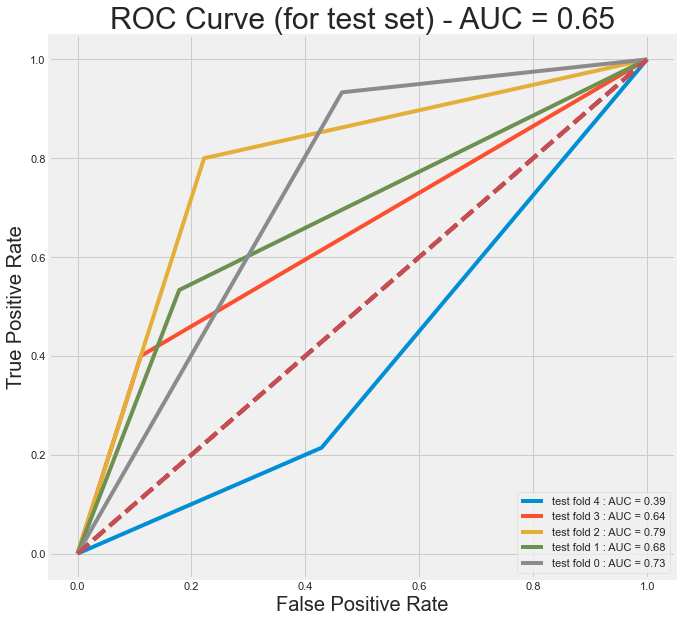

In [12]:
acc_adaboost = []
rocauc_adaboost = []
probs_adaboost = []

plt.figure(figsize=(10, 10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]
    ##########################################################
    #the above line is a list comprehension of following nested for loops.
    #train_indices = []
    #for sublist in train_indices_list:
    #    for item in sublist:
    #        train_indices.append(item)
    ##########################################################

    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]    
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
          
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)    
    
    DTC = DecisionTreeClassifier()
    adaDTC = AdaBoostClassifier(DTC, random_state=random_state)
    ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}   
    ada_param_dist = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  10**np.random.uniform(0., 1., size=8)}   
    n_iter_search = 10
    
    # Select grid search or random search for cross-validation
    if cv_strategy == 'grid':
        clf = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv=val_fold, scoring="roc_auc", 
                           n_jobs= 8, verbose = 1)
    elif cv_strategy == 'random':
        clf = RandomizedSearchCV(adaDTC, param_distributions = ada_param_dist, cv=val_fold, 
                                 scoring="roc_auc", n_jobs= 8, verbose = 1)
    
    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    adaDTC_best = clf.best_estimator_ 
    
    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)
    probs_adaboost.append(y_true)
    probs_adaboost.append(y_probs)

    

    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_adaboost.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:, 1])
    rocauc_adaboost.append(rocauc_test_fold)
    
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, rocauc_test_fold))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    print('==================================================================')
    
print("Acc. on test set = {}".format(np.mean(acc_adaboost)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_adaboost)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_adaboost)), fontsize=30)



### Random Forest

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   22.3s finished


Best parameters set found on development set:

{'n_estimators': 415, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   19.4s finished


Best parameters set found on development set:

{'n_estimators': 358, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   19.3s finished


Best parameters set found on development set:

{'n_estimators': 336, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   27.2s finished


Best parameters set found on development set:

{'n_estimators': 445, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   23.2s finished


Best parameters set found on development set:

{'n_estimators': 252, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Acc. on test set = 0.7547065337763013
ROCAUC on test set = 0.8118833459309649


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.81')

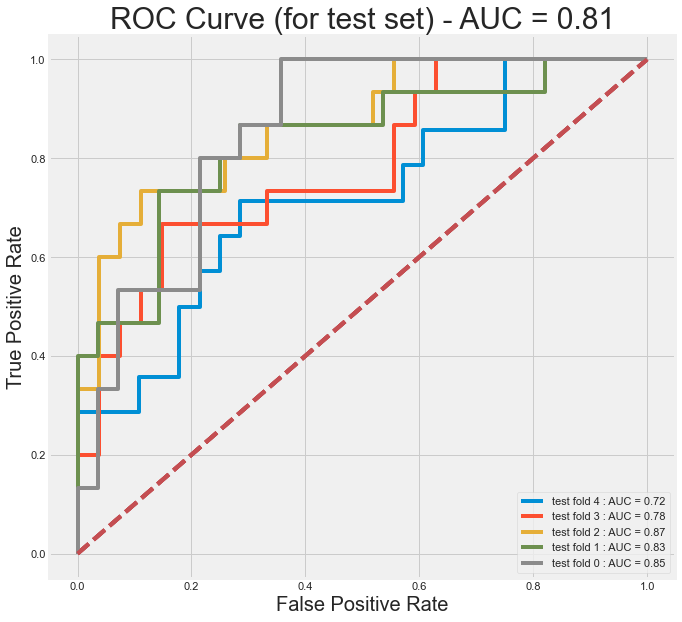

In [13]:
acc_rf = []
rocauc_rf = []
probs_rf = []
feat_imp_rf = np.zeros((len(X_data.columns), n_test_folds))
plt.figure(figsize=(10, 10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]
    
    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
    
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)#, shuffle=True) 
    RFC = RandomForestClassifier()

    
    ## Search grid for optimal parameters
    rf_param_grid = {"max_depth": [None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [False],
                  "n_estimators" :[100, 300, 500],
                  "criterion": ["gini"]}
    rf_param_dist = {"max_depth": [None],
                  "max_features": np.random.randint(1, 17, 10),
                  "min_samples_split": np.random.randint(2, 10, 5),
                  "min_samples_leaf": np.random.randint(1, 10, 5),
                  "bootstrap": [False, True],
                  "n_estimators" : np.random.randint(100, 500, 8),
                  "criterion": ["gini"]}

    
    
    # Select grid search or random search for cross-validation
    if cv_strategy == 'grid':
        clf = GridSearchCV(RFC, param_grid = rf_param_grid, cv=val_fold, scoring="roc_auc", n_jobs= 8, 
                           verbose = 1)
    elif cv_strategy == 'random':
        clf = RandomizedSearchCV(RFC, param_distributions= rf_param_dist, cv=val_fold, scoring="roc_auc",
                             n_jobs= 8, verbose = 1, n_iter = 20)
    

    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    RFC_best = clf.best_estimator_
    

    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)
    probs_rf.append(y_true)
    probs_rf.append(y_probs)


    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_rf.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:,1])
    rocauc_rf.append(rocauc_test_fold)
    
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, rocauc_test_fold))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
 
    feat_imp_rf[:, i_test_fold] = RFC_best.feature_importances_
    
    print('==================================================================')
    
    
print("Acc. on test set = {}".format(np.mean(acc_rf)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_rf)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_rf)), fontsize=30)

### Extra Tree Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   10.9s finished


Best parameters set found on development set:
{'n_estimators': 208, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 12, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    9.4s finished


Best parameters set found on development set:
{'n_estimators': 294, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 11, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   14.1s finished


Best parameters set found on development set:
{'n_estimators': 63, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   12.5s finished


Best parameters set found on development set:
{'n_estimators': 171, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   15.1s finished


Best parameters set found on development set:
{'n_estimators': 283, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Acc. on test set = 0.7499446290143965
ROCAUC on test set = 0.7856613756613757


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.79')

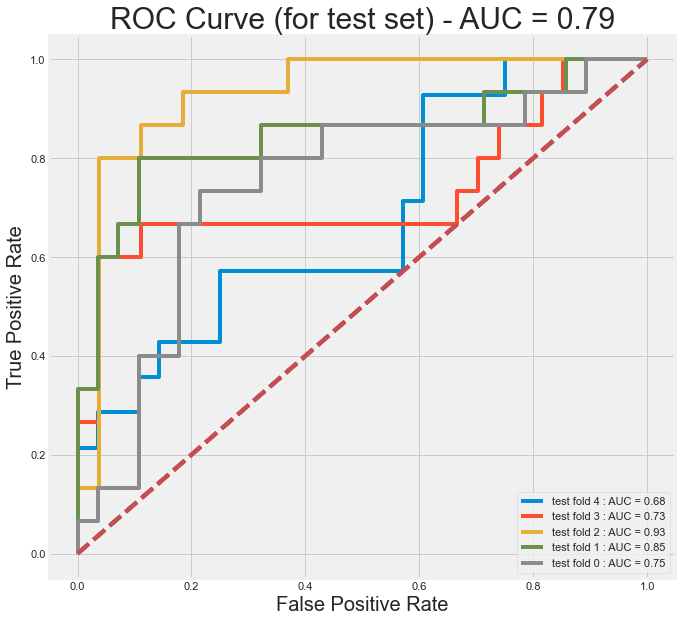

In [14]:
acc_ext = []
rocauc_ext = []
probs_ext = []
plt.figure(figsize=(10, 10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]

    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)#, shuffle=True)
    ExtC = ExtraTreesClassifier()

    
    ## Search grid for optimal parameters
    ex_param_grid = {"max_depth": [None],
                  "max_features": [1, 3, 10, 20],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [False],
                  "n_estimators" :[100, 300],
                  "criterion": ["gini"]}
    ex_param_dist = {"max_depth": [None],
                  "max_features": np.random.randint(1, 17, 15),
                  "min_samples_split": np.random.randint(2, 10, 5),
                  "min_samples_leaf": np.random.randint(1, 10, 5),
                  "bootstrap": [False, True],
                  "n_estimators" : np.random.randint(50, 300, 10),
                  "criterion": ["gini", "entropy"]}

    
    
    if cv_strategy == 'grid':
        clf = GridSearchCV(ExtC, param_grid = ex_param_grid, cv=val_fold, scoring="roc_auc", 
                           n_jobs= 8, verbose = 1)
    elif cv_strategy == 'random':
        clf = RandomizedSearchCV(ExtC, param_distributions= ex_param_dist, cv=val_fold, scoring="roc_auc",
                             n_jobs= 8, verbose = 1, n_iter=20)
    
   
    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    ExtC_best = clf.best_estimator_
    

    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)
    probs_ext.append(y_true)
    probs_ext.append(y_probs)

    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_ext.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:,1])
    rocauc_ext.append(rocauc_test_fold)
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, rocauc_test_fold))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    
    
    print('==================================================================')
    
print("Acc. on test set = {}".format(np.mean(acc_ext)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_ext)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_ext)), fontsize=30)

### Gradient Boosting

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  93 out of 100 | elapsed:    4.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.5s finished


Best parameters set found on development set:
{'n_estimators': 92, 'min_samples_leaf': 103, 'max_features': 0.2, 'max_depth': 9, 'loss': 'deviance', 'learning_rate': 0.026238661159751337}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.0s finished


Best parameters set found on development set:
{'n_estimators': 290, 'min_samples_leaf': 50, 'max_features': 0.1, 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.009253424262134317}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.3s finished


Best parameters set found on development set:
{'n_estimators': 143, 'min_samples_leaf': 65, 'max_features': 0.3, 'max_depth': 7, 'loss': 'deviance', 'learning_rate': 0.0012074226716122366}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.7s finished


Best parameters set found on development set:
{'n_estimators': 264, 'min_samples_leaf': 26, 'max_features': 0.3, 'max_depth': 7, 'loss': 'deviance', 'learning_rate': 0.0678872210161785}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.3s finished


Best parameters set found on development set:
{'n_estimators': 162, 'min_samples_leaf': 46, 'max_features': 0.2, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.04421757347103449}
Acc. on test set = 0.702547065337763
ROCAUC on test set = 0.7357671957671958


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.74')

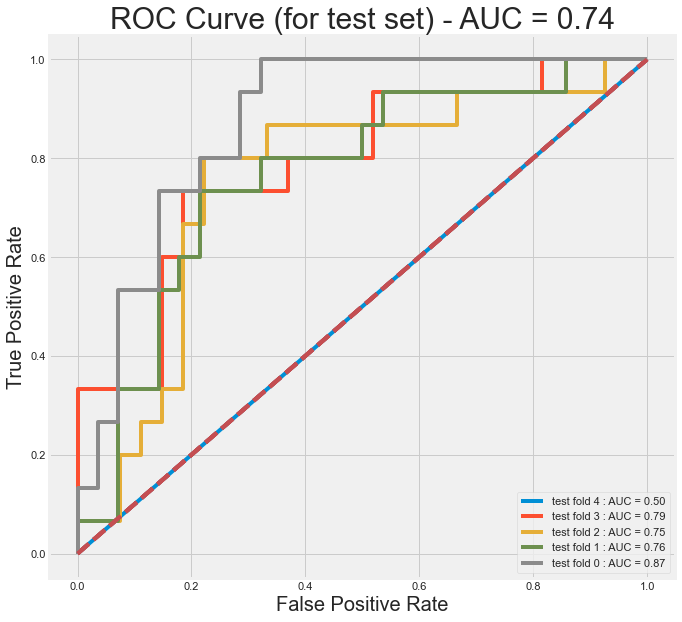

In [15]:
acc_gb = []
rocauc_gb = []
probs_gb = []
plt.figure(figsize=(10, 10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]

    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
    
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)
        
    GBC = GradientBoostingClassifier()
    gb_param_grid = {'loss' : ["deviance"],
                  'n_estimators' : [100,200,300],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [3, 4, 8],
                  'min_samples_leaf': [1, 100,150],
                  'max_features': [0.3, 0.1] 
                  }
    gb_param_dist = {'loss' : ["deviance"],
                  'n_estimators' : np.random.randint(50, 300, 20),
                  'learning_rate': 10**np.random.uniform(-1, -3, 5),
                  'max_depth': np.random.randint(3, 10, 6),
                  'min_samples_leaf': np.random.randint(1, 150, 5),
                  'max_features': [0.4, 0.3, 0.2, 0.1] 
                  }

    
    if cv_strategy == 'grid':
        clf = GridSearchCV(GBC, param_grid = gb_param_grid, cv=val_fold, scoring="roc_auc", n_jobs= 4, verbose = 1)
    elif cv_strategy =='random':
        clf = RandomizedSearchCV(GBC, param_distributions = gb_param_dist, cv=val_fold, scoring="roc_auc",
                             n_jobs= 4, verbose = 1, n_iter = 20)
    
    
    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    GBC_best = clf.best_estimator_
    
    
    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)
    probs_gb.append(y_true)
    probs_gb.append(y_probs)
 

    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_gb.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:,1])
    rocauc_gb.append(rocauc_test_fold)
    
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, rocauc_test_fold))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    
    print('==================================================================')
    
print("Acc. on test set = {}".format(np.mean(acc_gb)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_gb)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_gb)), fontsize=30)

### SVM

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


Best parameters set found on development set:
{'kernel': 'rbf', 'gamma': 0.0008732246633144464, 'C': 693}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


Best parameters set found on development set:
{'kernel': 'rbf', 'gamma': 0.001123377719761659, 'C': 568}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


Best parameters set found on development set:
{'kernel': 'rbf', 'gamma': 0.0007564579166173006, 'C': 862}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


Best parameters set found on development set:
{'kernel': 'rbf', 'gamma': 1.3267060401063732e-06, 'C': 580}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters set found on development set:
{'kernel': 'rbf', 'gamma': 1.6622285311703066e-06, 'C': 355}
Acc. on test set = 0.6833887043189368
ROCAUC on test set = 0.7029037540942303


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.70')

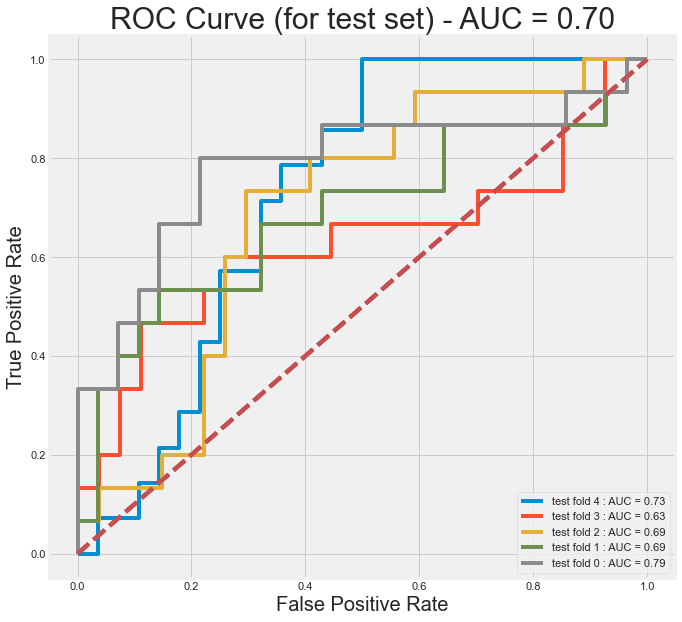

In [16]:
acc_svm = []
rocauc_svm = []
probs_svm = []
plt.figure(figsize=(10, 10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]

    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
    
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)#, shuffle=True)
    
    
    SVMC = SVC(probability=True)
    svc_param_grid = {'kernel': ['rbf'], 
                      'gamma': [0.000001, 0.001, 0.01, 0.1, 1],
                      'C': [1, 10, 50, 100, 200,300, 1000]}
    svc_param_dist = {'kernel': ['rbf'], 
                      'gamma': 10**(np.random.uniform(-6, 1, 20)),
                      'C': np.random.randint(1, 1000, 20)}

    if cv_strategy == 'grid':
        clf = GridSearchCV(SVMC, param_grid = svc_param_grid, cv=val_fold, scoring="roc_auc", n_jobs= 4, verbose = 1)
    elif cv_strategy == 'random':
        clf = RandomizedSearchCV(SVMC, param_distributions = svc_param_dist, cv=val_fold, 
                             scoring="roc_auc", n_jobs= 4, verbose = 1, n_iter=20)

    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    SVMC_best = clf.best_estimator_

    
    
    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)
    probs_svm.append(y_true)
    probs_svm.append(y_probs)


    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_svm.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:,1])
    rocauc_svm.append(rocauc_test_fold)
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    
    print('==================================================================')
    
print("Acc. on test set = {}".format(np.mean(acc_svm)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_svm)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_svm)), fontsize=30)

### MLP

StratifiedKFold(n_splits=5, random_state=108, shuffle=False)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.8s finished


Best parameters set found on development set:
{'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': 50, 'early_stopping': False, 'alpha': 0.0009655457742333551}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   20.2s finished


Best parameters set found on development set:
{'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': 100, 'early_stopping': False, 'alpha': 0.46264909145904665}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.9s finished


Best parameters set found on development set:
{'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'early_stopping': False, 'alpha': 0.08074918209333626}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.6s finished


Best parameters set found on development set:
{'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': 100, 'early_stopping': False, 'alpha': 0.0029622992164174016}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.5s finished


Best parameters set found on development set:
{'max_iter': 100, 'learning_rate': 'constant', 'hidden_layer_sizes': (5,), 'early_stopping': False, 'alpha': 0.00024130690842744744}
Acc. on test set = 0.6976744186046512
ROCAUC on test set = 0.7348916603678508


Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.73')

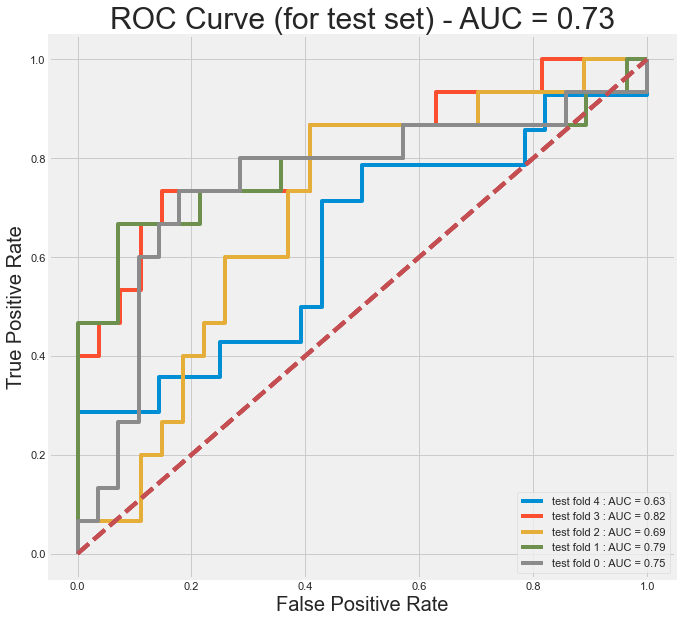

In [17]:
np.random.seed()
random_state=108
n_test_folds = 5
n_val_folds = 5
kfold = StratifiedKFold(n_splits=n_test_folds, random_state=random_state)#, shuffle=True)
print(kfold)
stratified_fold = []
for train_index, test_index in kfold.split(X_data, Y_data):
    stratified_fold.append(list(test_index))
    
    
acc_mlp = []
rocauc_mlp = []
probs_mlp = []
plt.figure(figsize=(10,10))

# Scroll through whole dataset for 5-fold cross validation and testing
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]


    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 
    fit_train = imp0.fit(X_train)
    test_imputed = imp0.transform(X_test)
    train_imputed = imp0.transform(X_train)
    for i in range(len(X_train)):
        X_train.iloc[i] = train_imputed[i]
    
    for i in range(len(X_test)):
        X_test.iloc[i] = test_imputed[i]
    
    
    val_fold = StratifiedKFold(n_splits=n_val_folds, random_state=random_state)
    
    MLP = MLPClassifier(random_state=random_state)
    mlp_param_grid = {"hidden_layer_sizes": [(10,), (50,), (100,), (10, 10), (25, 25)],
                     "alpha": [100.0, 10., 1.0, 0.1, 0.001, 0.0001],
                     "learning_rate": ["constant", "adaptive"],
                     "max_iter": [ 500, 1000],
                     "early_stopping": [True]}
    mlp_param_dist = {"hidden_layer_sizes": [(5,), (10,), (50), (100), (5,5,5), (10,10), (5,10,5), (25,25)],
                     "alpha": 10**np.random.uniform(-4, 2, 20),
                     "learning_rate": ["constant", "adaptive"],
                     "max_iter": [100, 500, 1000],
                     "early_stopping": [True, False]}

    if cv_strategy == 'grid':
        clf = GridSearchCV(MLP, param_grid = mlp_param_grid, cv=val_fold, scoring="roc_auc", n_jobs= 4, verbose = 1)
    elif cv_strategy == 'random':
        clf = RandomizedSearchCV(MLP, param_distributions=mlp_param_dist, cv=val_fold, 
                             scoring="accuracy", n_jobs= 4, verbose = 1, n_iter=20)

    clf.fit(X_train,Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    MLP_best = clf.best_estimator_
        
    
    y_true, y_pred = Y_test, clf.predict(X_test)
    y_probs =  clf.predict_proba(X_test)
    probs_mlp.append(y_true)
    probs_mlp.append(y_probs)


    accuracy_test_fold = accuracy_score(y_true, y_pred)
    acc_mlp.append(accuracy_test_fold)
    rocauc_test_fold = roc_auc_score(y_true, y_probs[:,1])
    rocauc_mlp.append(rocauc_test_fold)
    
    fpr, tpr, threshold = roc_curve(Y_test, y_probs[:,1])
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, rocauc_test_fold))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    
    print('==================================================================')
    
print("Acc. on test set = {}".format(np.mean(acc_mlp)))
print("ROCAUC on test set = {}".format(np.mean(rocauc_mlp)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_mlp)), fontsize=30)

## Results

### Area under Receiver Operating Characteristic curve (ROC-AUC) and Accuracy values on test set

In [18]:
matrix_dict = {'Algorithm': ['AdaBoost', 'Random Forest', 'Extra Tree Classifier', 'Gradient Boosting', 'SVM', 'MLP'], 
               'accuracy': [acc_adaboost, acc_rf, acc_ext, acc_gb, acc_svm, acc_mlp], 
               'rocauc':[rocauc_adaboost, rocauc_rf, rocauc_ext, rocauc_gb, rocauc_svm, rocauc_mlp],
              'probs': [probs_adaboost, probs_rf, probs_ext, probs_gb, probs_svm, probs_mlp]}

acc_mean = []
acc_std = []
rocauc_mean = []
rocauc_std = []
for a, r, p, name in zip(matrix_dict['accuracy'], matrix_dict['rocauc'], 
                         matrix_dict['probs'], matrix_dict['Algorithm']):
    
    acc_mean.append(np.mean(a))
    acc_std.append(np.std(a))
    rocauc_mean.append(np.mean(r))
    rocauc_std.append(np.std(r))
    ll = []
    for i_test_fold in range(n_test_folds):
        ll.append(np.hstack((p[2*i_test_fold].to_numpy().reshape(-1, 1), p[(2*i_test_fold)+1])))
    probs_np = np.vstack(ll)

    import scipy.io as sio
    np.savetxt("probs_{}-Wout_labmarkers.csv".format(name), probs_np, delimiter=",")
    
    
matrix_df = pd.DataFrame({'Algorithm': ['AdaBoost', 'Random Forest', 'Extra Tree Classifier', 'Gradient Boosting', 'SVM', 'MLP'], 
                          'acc_mean': acc_mean, 'acc_std': acc_std, 'rocauc_mean': rocauc_mean, 'rocauc_std': rocauc_std})
matrix_df

,Algorithm,acc_mean,acc_std,rocauc_mean,rocauc_std
0,AdaBoost,0.669546,0.114299,0.647619,0.136608
1,Random Forest,0.754707,0.046597,0.811883,0.053368
2,Extra Tree Classifier,0.749945,0.035867,0.785661,0.090570
3,Gradient Boosting,0.702547,0.054177,0.735767,0.125258
4,SVM,0.683389,0.053919,0.702904,0.052286
5,MLP,0.697674,0.065546,0.734892,0.067046


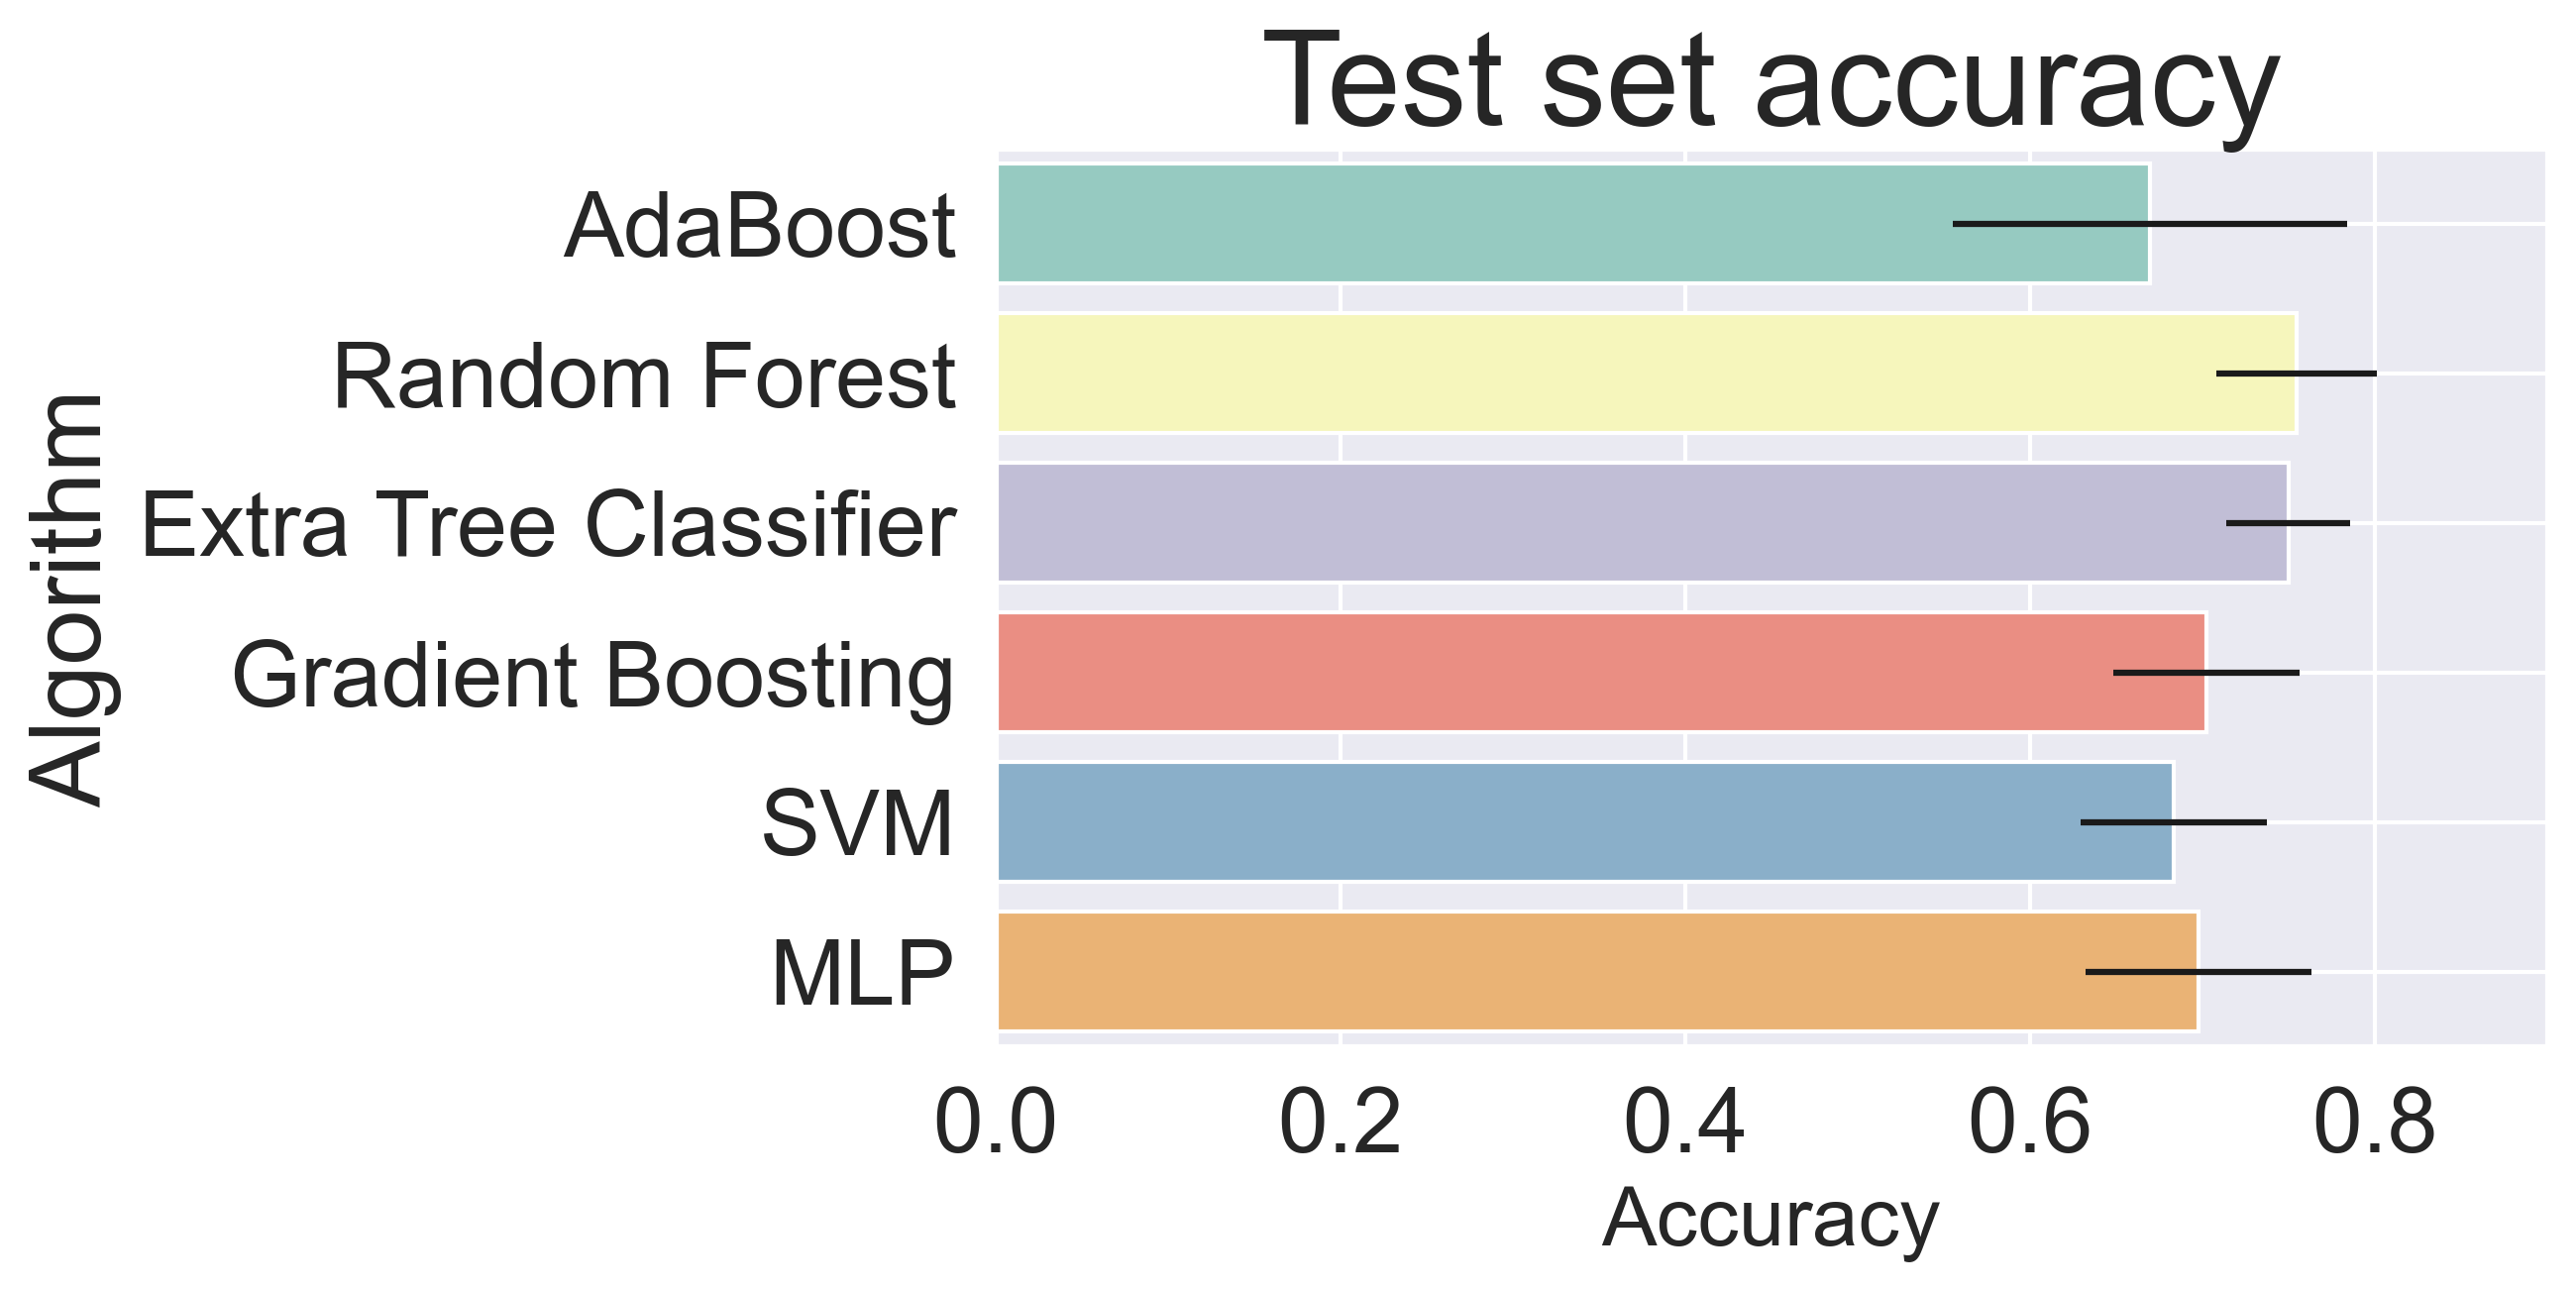

In [19]:
plt.figure(dpi=300)
sns.set(font_scale=2)
g = sns.barplot("acc_mean", "Algorithm", data = matrix_df, palette="Set3",orient = "h",**{'xerr':acc_std})
g.set_xlabel("Accuracy", fontsize=20)
g.set_xlim([0, 0.9])
g = g.set_title("Test set accuracy", fontsize=32)
plt.grid(True)

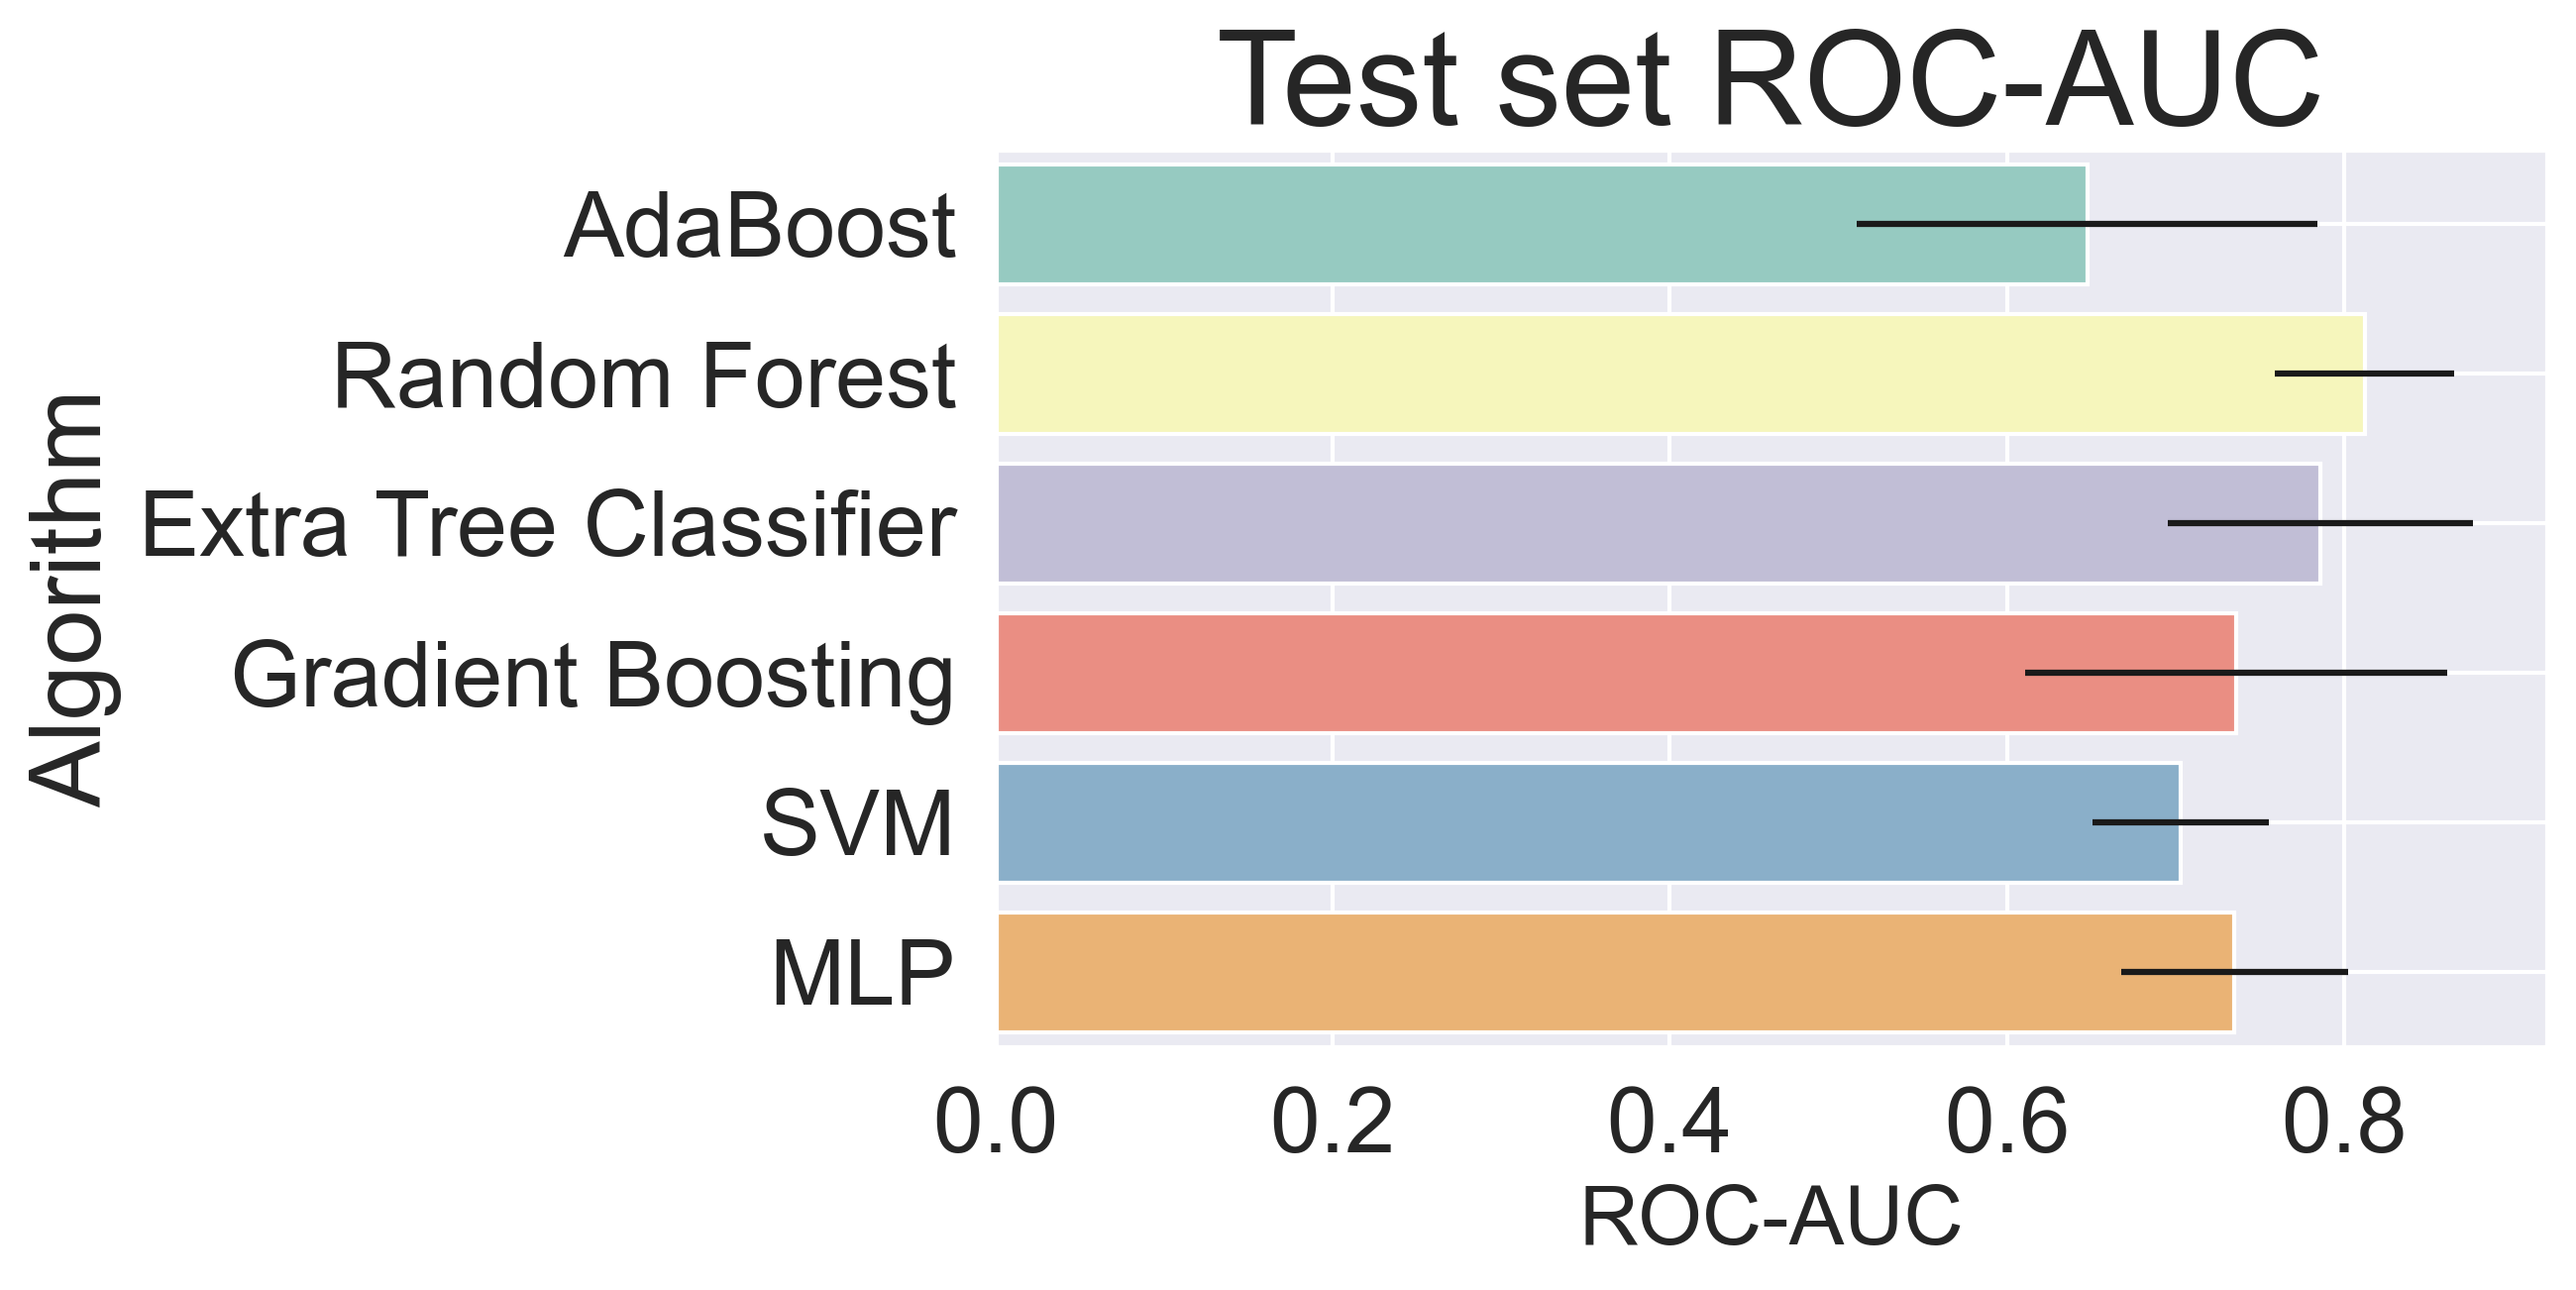

In [20]:
plt.figure(dpi=300)
sns.set(font_scale=2)
g = sns.barplot("rocauc_mean", "Algorithm", data = matrix_df, palette="Set3",orient = "h",**{'xerr':rocauc_std})
g.set_xlabel("ROC-AUC", fontsize=20)
g = g.set_title("Test set ROC-AUC", fontsize=32)
plt.grid(True)

Out of all 6 models, Random Forest is performing best giving highest value of area under ROC curve (0.82). Let's look at the 10 most important features used by this model to perform classification.

### Feature importance plot of the best model

In [21]:
X_train.rename(columns={"Bicarbonate (Total CO2)":"Bicarbonate"}, inplace=True)

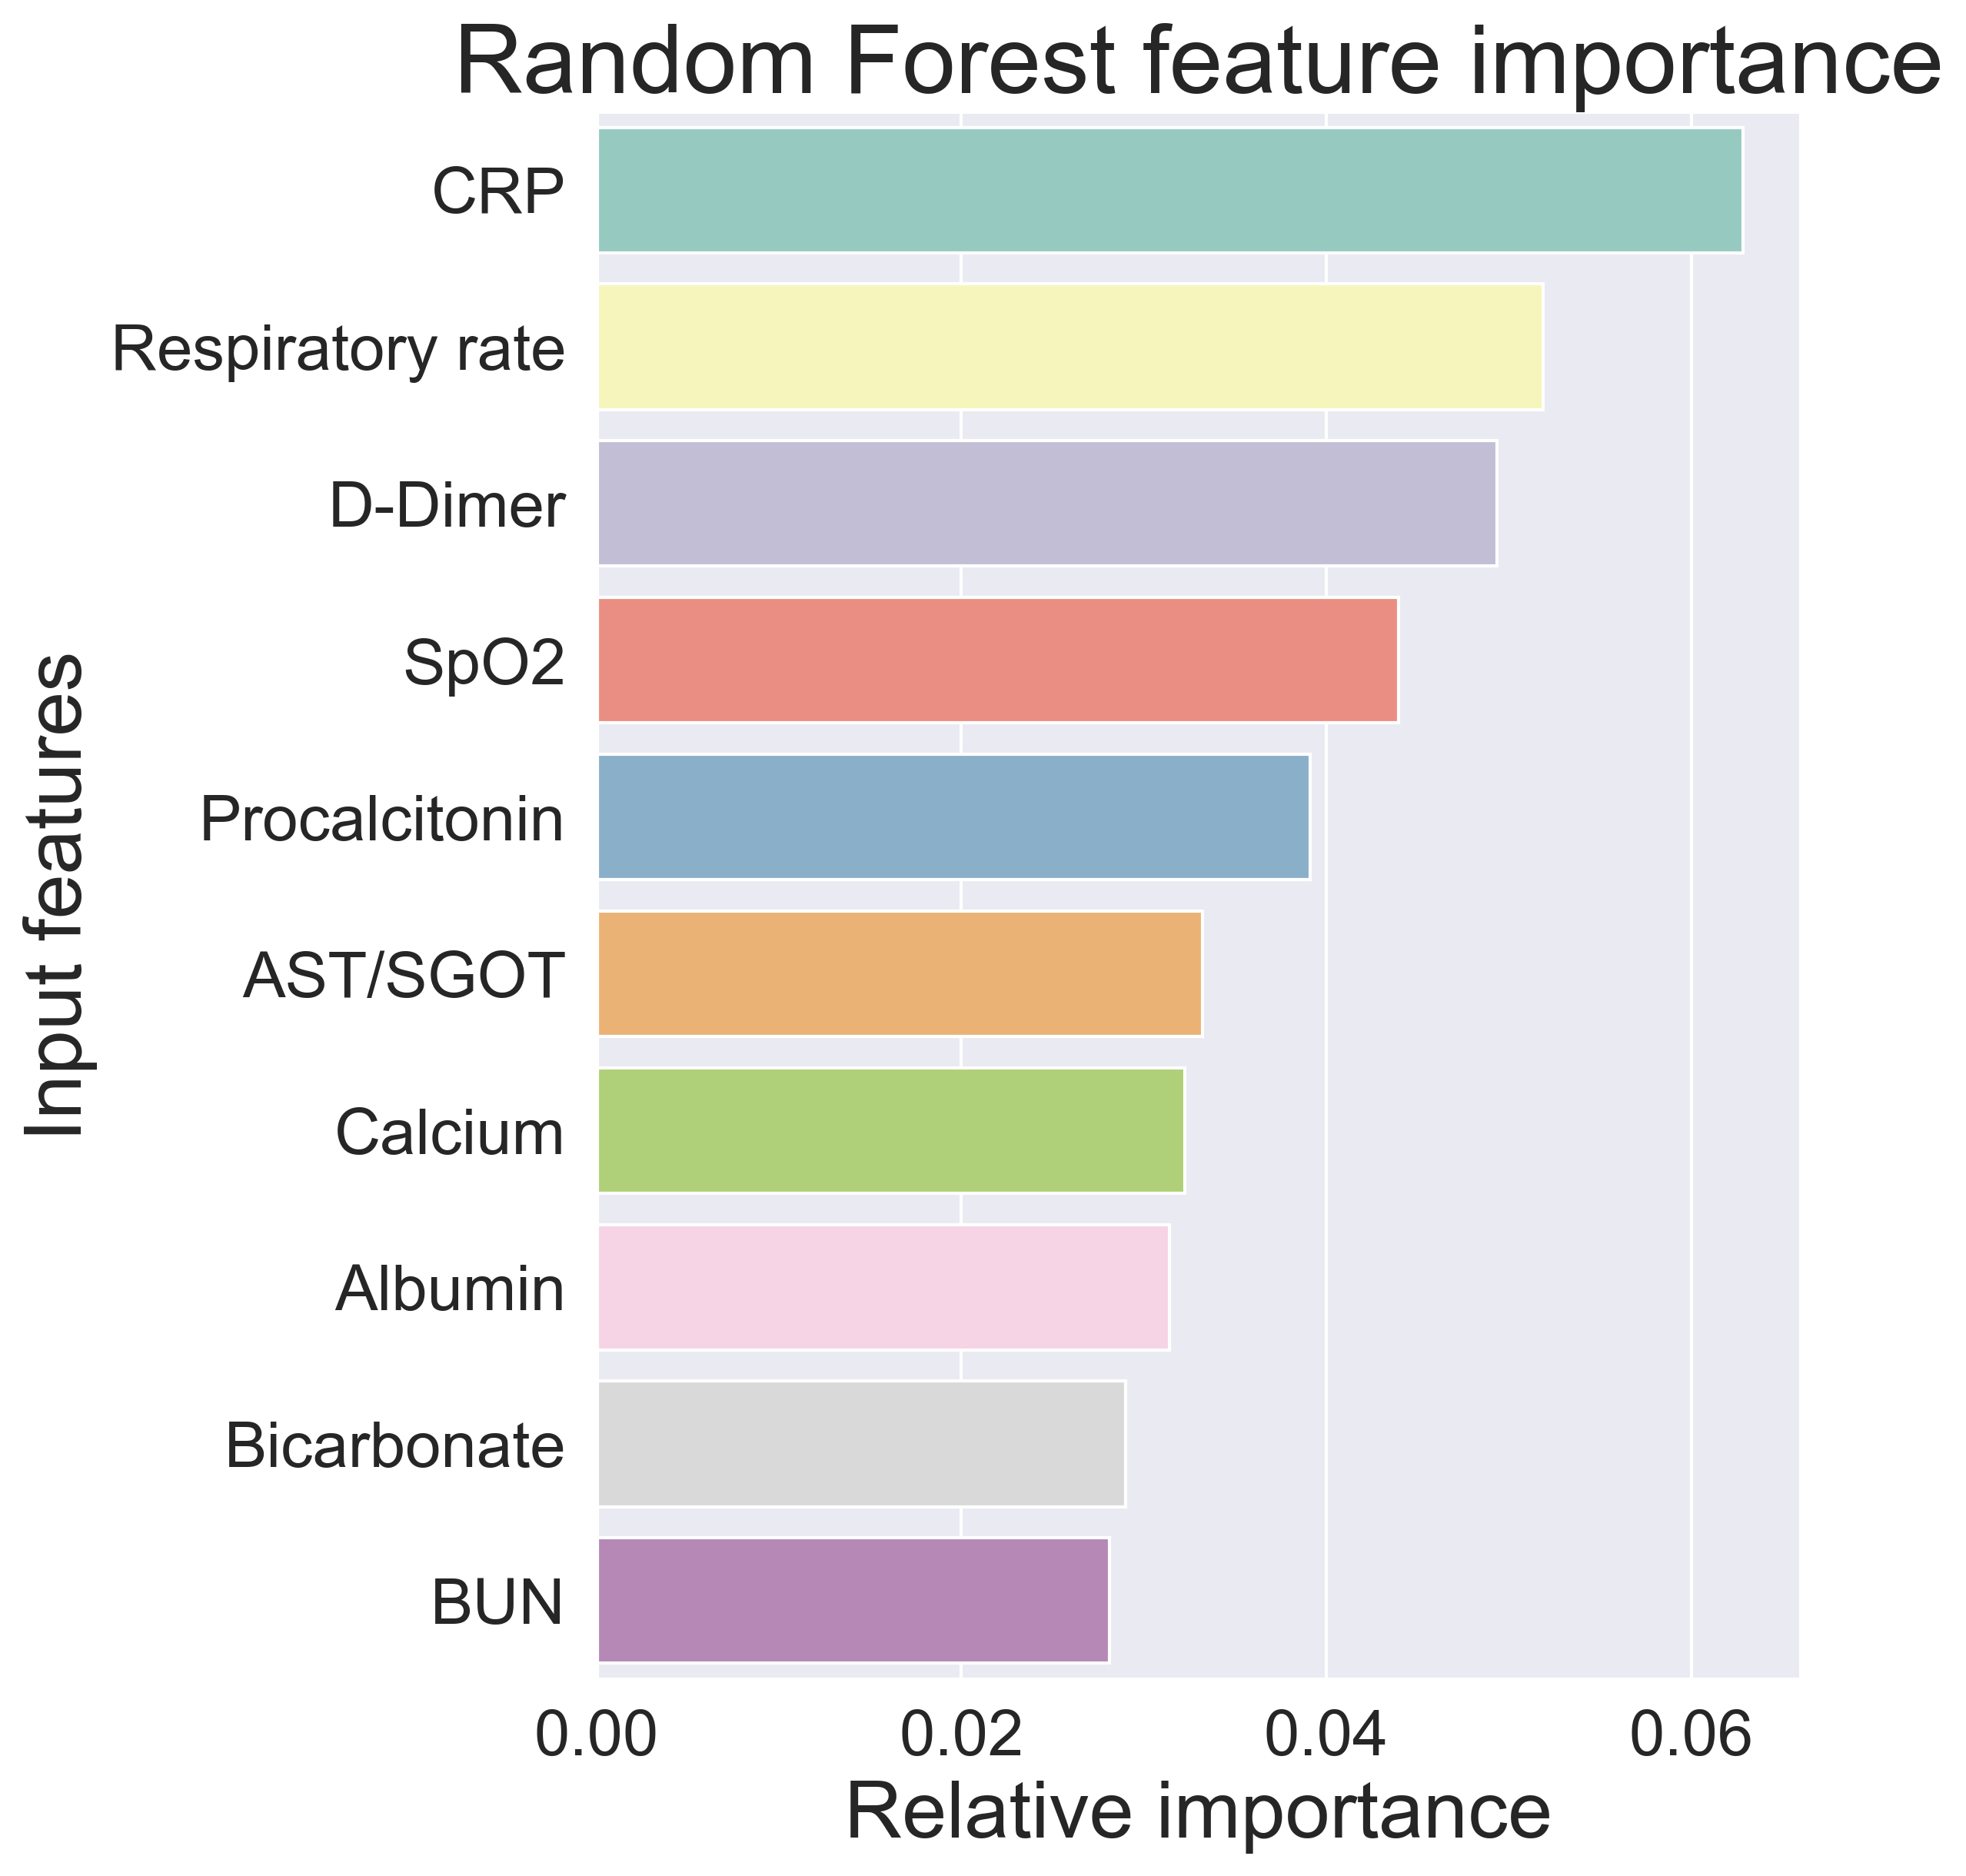

In [22]:
nrows = 1
ncols = 1
sns.set(font_scale=1.)
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(6, 9), dpi=300)

names_classifiers = [("Random Forest", RFC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(np.mean(feat_imp_rf, axis=1))[::-1][:10]
        
        g = sns.barplot(y=X_train.columns[indices][:10], x = np.mean(feat_imp_rf, axis=1)[indices][:10], 
                        orient='h', palette='Set3')#,ax=axes[row])
        g.set_xlabel("Relative importance",fontsize=25)
        g.set_ylabel("Input features",fontsize=25)
        g.tick_params(labelsize=20)
        g.set_title(name + " feature importance", fontsize=30)
        nclassifier += 1

Feature importance plot indicates that CRP, D-dimer, Respiratory rate, and SPO2 are the most important feature in determisning whether a given patient will need ICU care or not in the future. This matches  well with many recent studies in the literature.
Let's look at the distribution of these features in patients which required ICU-care and which did not.

#### CRP

Text(0.5, 0, 'CRP')

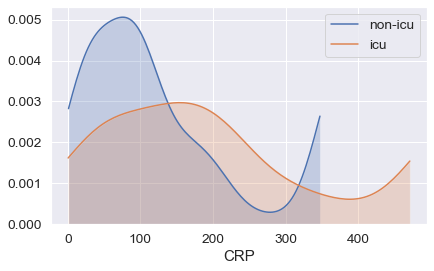

In [23]:
plt.figure()
sns.set(font_scale=1.25)
g = sns.kdeplot(dataset.loc[dataset.icu_outcome==0]['CRP'], cut=0, shade=True, label='non-icu')
g = sns.kdeplot(dataset.loc[dataset.icu_outcome==1]['CRP'], cut=0, shade=True, label='icu')
plt.xlabel("CRP")

As can be observed in the above figure, the mean and mode of CRP in patients that require ICU care is higher than those that do not require it.

#### SpO2

Text(0.5, 0, 'SpO2')

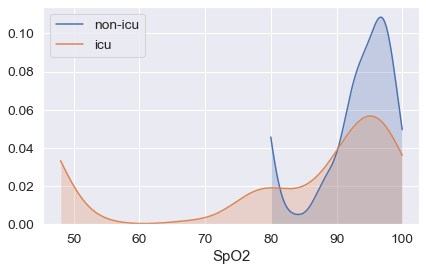

In [24]:
plt.figure()
sns.set(font_scale=1.25)
g = sns.kdeplot(dataset.loc[dataset.icu_outcome==0]['SpO2'], cut=0, shade=True, label='non-icu')
g = sns.kdeplot(dataset.loc[dataset.icu_outcome==1]['SpO2'], cut=0, shade=True, label='icu')
plt.xlabel("SpO2")

The average value of SpO2 is much lower in patients requiring ICU care than those that do not require it. This again matches with the clinical observations, as patients with low oxygen saturation typically require external breathing support and critical care (including ventilation) and hence are usually admitted to ICU.

## Extra model: Gradient boosting with XGBoost

Let's look at gradient boosting model once again, but using more powerful and efficient XGBoost library. [XGBoost](https://xgboost.readthedocs.io/en/latest/) stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. Specifically, it uses second order gradient information of loss function and advanced regularization techniques for better generalization.

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
[1.9799297  0.97992975 0.9509403  0.6988288  0.63654697 0.5882252
 0.4136603  0.22322994 0.17468299 0.13927019 0.12212603 0.02467553
 0.02389315 0.02301938 0.02224152 0.0048611  0.00477877 0.00438693]
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
           

Text(0.5, 1.0, 'ROC Curve (for test set) - AUC = 0.76')

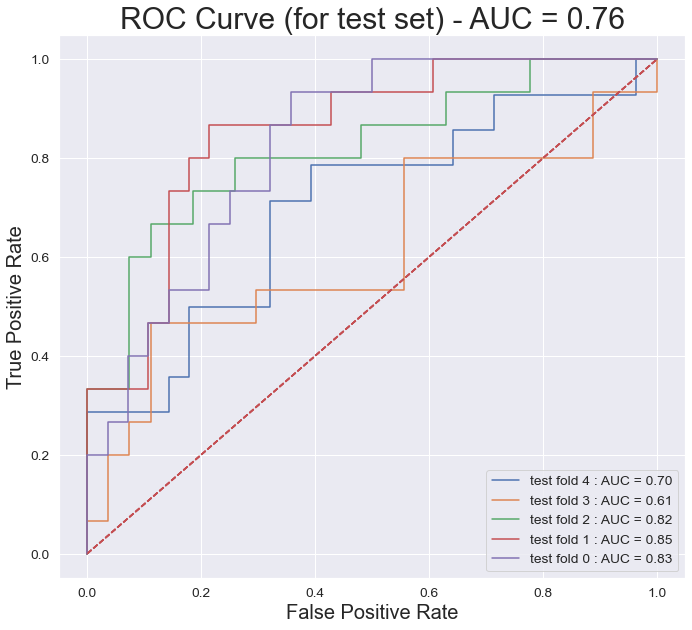

In [26]:
random_state = 108
n_test_folds = 5

kfold = StratifiedKFold(n_splits=n_test_folds, random_state=random_state)#, shuffle=True)
stratified_fold = []
for train_index, test_index in kfold.split(X_data, Y_data):
    stratified_fold.append(list(test_index))


acc_xgboost = []
rocauc_xgboost = []
plt.figure(figsize=(10, 10))
for i_test_fold in range(n_test_folds-1, -1, -1):
    test_indices = stratified_fold[i_test_fold]
    train_indices_list = stratified_fold[:i_test_fold] + stratified_fold[i_test_fold+1:]
    train_indices = [item for sublist in train_indices_list for item in sublist]


    shuffled_train_ind = np.random.choice(train_indices, len(train_indices), replace=False)
    shuffled_test_ind = np.random.choice(test_indices, len(test_indices), replace=False)
    X_train = X_data.iloc[shuffled_train_ind]
    Y_train = Y_data[shuffled_train_ind]
    X_test = X_data.iloc[shuffled_test_ind]
    Y_test = Y_data[shuffled_test_ind] 


    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train, Y_train)

    print(model)

    # make predictions for test data
    y_pred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)
    #print(pred_prob)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(Y_test, predictions)
    acc_xgboost.append(accuracy)
    conf_mat = confusion_matrix(Y_test, predictions)



    fpr, tpr, threshold = roc_curve(Y_test, pred_prob[:,1])
    roc_auc = auc(fpr, tpr)
    rocauc_xgboost.append(roc_auc)
    plt.plot(fpr, tpr, label = 'test fold {} : AUC = {:.2f}'.format(i_test_fold, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)

    print(threshold)

print("Final ROCAUC = {}".format(np.mean(rocauc_xgboost)))
plt.title('ROC Curve (for test set) - AUC = {:.2f}'.format(np.mean(rocauc_xgboost)), fontsize=30)


Apparently, XGBoost (AUC=0.76) does not seem to perform better than standard gradient boosting (AUC=0.79) algorithm for this dataset for a given classification task.